In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

1. 이진 로지스틱 회귀 실습



In [2]:
# 1. 데이터 불러오기 - 유방암 데이터셋 (양성/악성 분류)
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print(f"데이터 형태: {X.shape}")
print(f"클래스 분포: \n{pd.Series(y).value_counts()}")
print(f"특성 이름: {cancer.feature_names[:5]}... (총 {len(cancer.feature_names)}개)")
print(f"타겟 설명: {cancer.target_names} (0: 악성, 1: 양성)")

# 2. 데이터 전처리 및 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 4. 모델 예측
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # 양성 클래스 확률

# 5. 모델 평가
print("\n[이진 분류 모델 평가]")
print(f"정확도: {accuracy_score(y_test, y_pred):.4f}")


데이터 형태: (569, 30)
클래스 분포: 
1    357
0    212
Name: count, dtype: int64
특성 이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']... (총 30개)
타겟 설명: ['malignant' 'benign'] (0: 악성, 1: 양성)

[이진 분류 모델 평가]
정확도: 0.9825


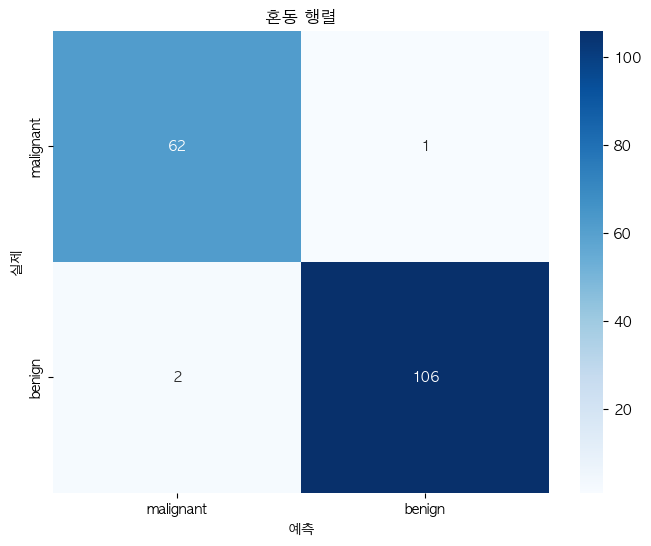


[분류 보고서]
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [3]:

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, 
            yticklabels=cancer.target_names)
plt.xlabel('예측')
plt.ylabel('실제')
plt.title('혼동 행렬')
plt.show()

# 분류 보고서
print("\n[분류 보고서]")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


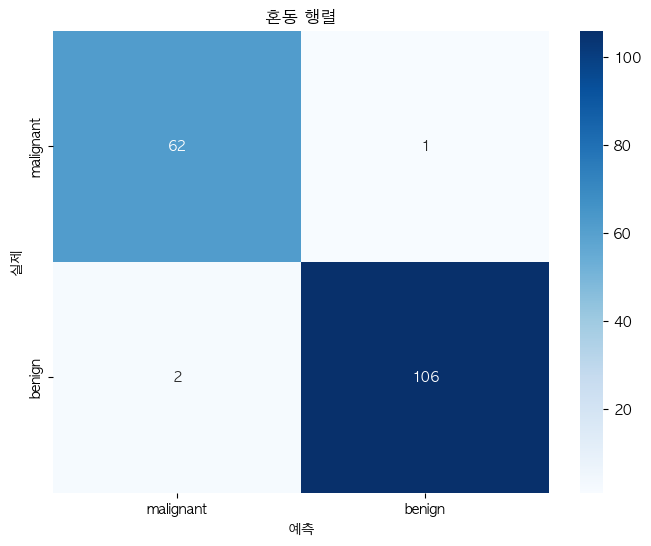


[분류 보고서]
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [4]:

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, 
            yticklabels=cancer.target_names)
plt.xlabel('예측')
plt.ylabel('실제')
plt.title('혼동 행렬')
plt.show()

# 분류 보고서
print("\n[분류 보고서]")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


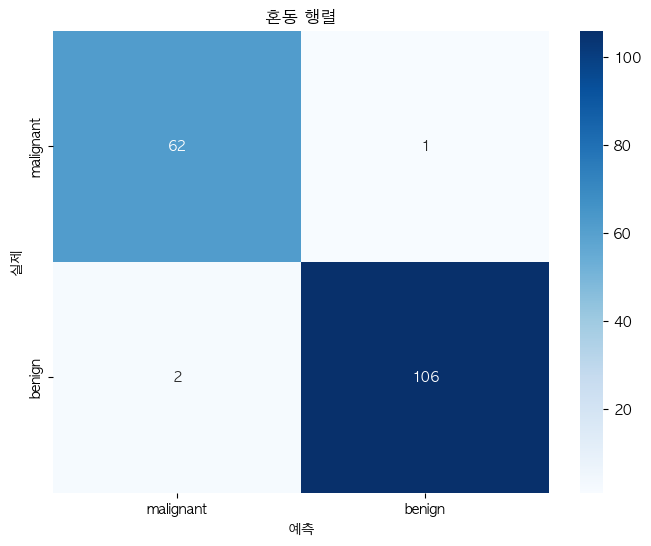


[분류 보고서]
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [5]:

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, 
            yticklabels=cancer.target_names)
plt.xlabel('예측')
plt.ylabel('실제')
plt.title('혼동 행렬')
plt.show()

# 분류 보고서
print("\n[분류 보고서]")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


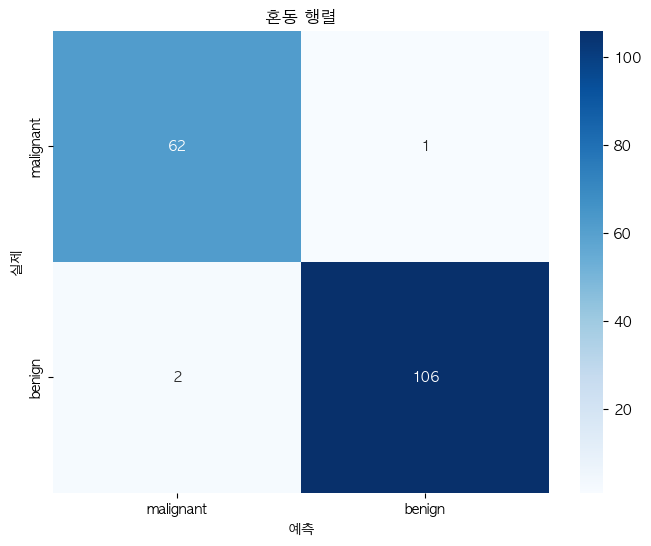


[분류 보고서]
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [6]:

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, 
            yticklabels=cancer.target_names)
plt.xlabel('예측')
plt.ylabel('실제')
plt.title('혼동 행렬')
plt.show()

# 분류 보고서
print("\n[분류 보고서]")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


2. 다항 로지스틱 회귀 실습


In [8]:
# 1. 데이터 불러오기 - 붓꽃 데이터셋 (3개 클래스)
iris = load_iris()
X = iris.data
y = iris.target

print(f"\n데이터 형태: {X.shape}")
print(f"클래스 분포: \n{pd.Series(y).value_counts()}")
print(f"특성 이름: {iris.feature_names}")
print(f"타겟 설명: {iris.target_names}")

# 2. 데이터 전처리 및 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 모델 생성 및 학습
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multi_model.fit(X_train_scaled, y_train)

# 4. 모델 예측
y_pred = multi_model.predict(X_test_scaled)
y_prob = multi_model.predict_proba(X_test_scaled)



데이터 형태: (150, 4)
클래스 분포: 
0    50
1    50
2    50
Name: count, dtype: int64
특성 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
타겟 설명: ['setosa' 'versicolor' 'virginica']


/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[다항 분류 모델 평가]
정확도: 1.0000


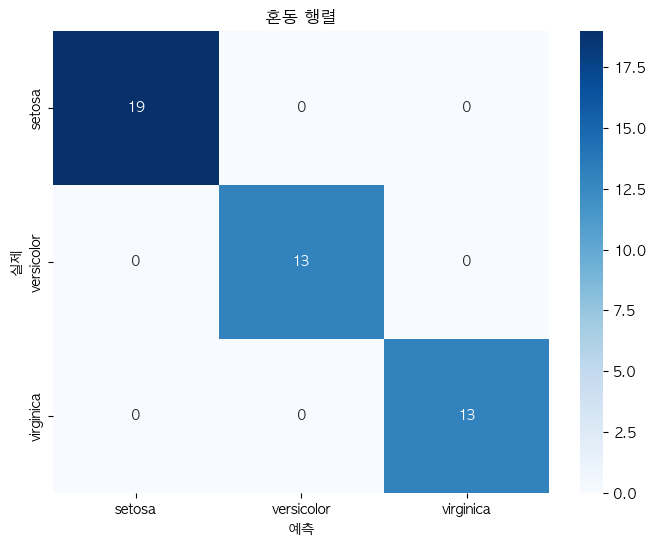


[분류 보고서]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [9]:

# 5. 모델 평가
print("\n[다항 분류 모델 평가]")
print(f"정확도: {accuracy_score(y_test, y_pred):.4f}")

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('예측')
plt.ylabel('실제')
plt.title('혼동 행렬')
plt.show()

# 분류 보고서
print("\n[분류 보고서]")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 결정 경계 시각화 (첫 번째, 두 번째 특성 사용)
plt.figure(figsize=(12, 8))


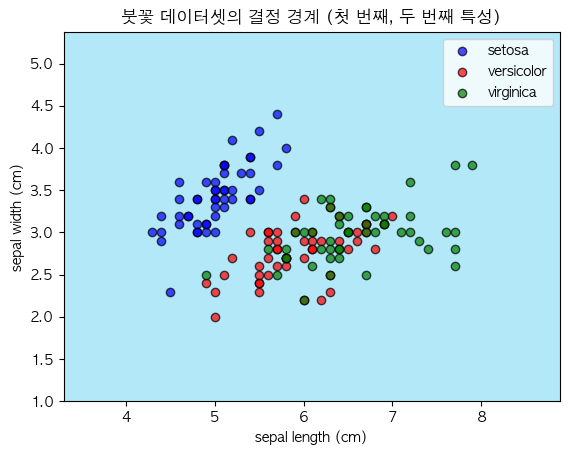

In [10]:

# 메쉬 그리드 생성
h = 0.02  # 그리드 간격
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 메쉬 그리드의 각 지점에 대한 예측
Z = multi_model.predict(np.c_[xx.ravel(), yy.ravel(), 
                             np.ones(xx.ravel().shape[0]) * X[:, 2].mean(), 
                             np.ones(xx.ravel().shape[0]) * X[:, 3].mean()])
Z = Z.reshape(xx.shape)

# 결정 경계 그리기
plt.contourf(xx, yy, Z, alpha=0.3, cmap='rainbow')

# 훈련 데이터 그리기
for i, color, label in zip(range(3), ['blue', 'red', 'green'], iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=label, 
                edgecolors='k', alpha=0.7)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('붓꽃 데이터셋의 결정 경계 (첫 번째, 두 번째 특성)')
plt.legend()
plt.show()

3. 로지스틱 회귀 시그모이드 함수 시각화

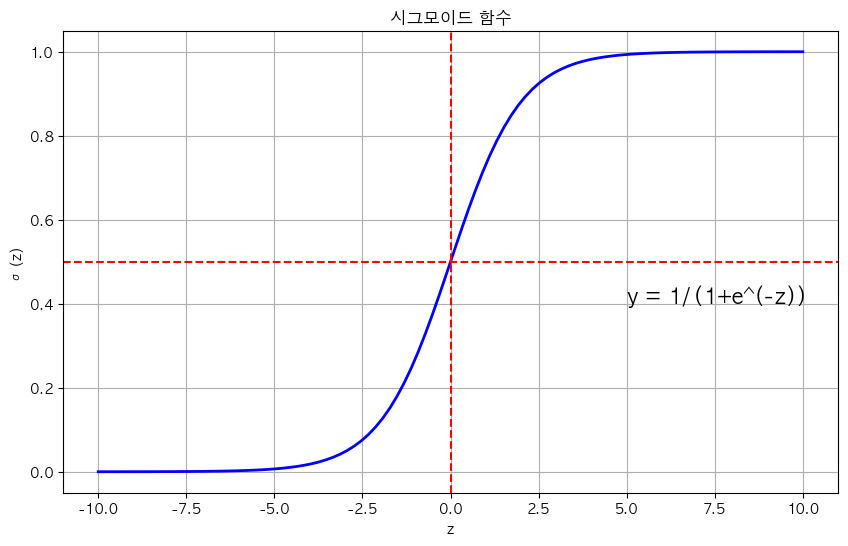

In [11]:
# 시그모이드 함수 직접 구현 및 시각화
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 시그모이드 함수 시각화
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, sig, 'b-', linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('시그모이드 함수')
plt.ylabel('σ(z)')
plt.xlabel('z')
plt.grid(True)
plt.text(5, 0.4, 'y = 1/(1+e^(-z))', fontsize=15)
plt.show()

4. 수동으로 로지스틱 회귀 구현하기


[수동 구현 모델과 sklearn 모델 비교]
직접 구현한 모델 가중치: [32.92614727 -7.43092969]
직접 구현한 모델 편향: 32.35558939492356
sklearn 모델 가중치: [-2.32856546  1.28307927]
sklearn 모델 편향: -1.1337069664981911


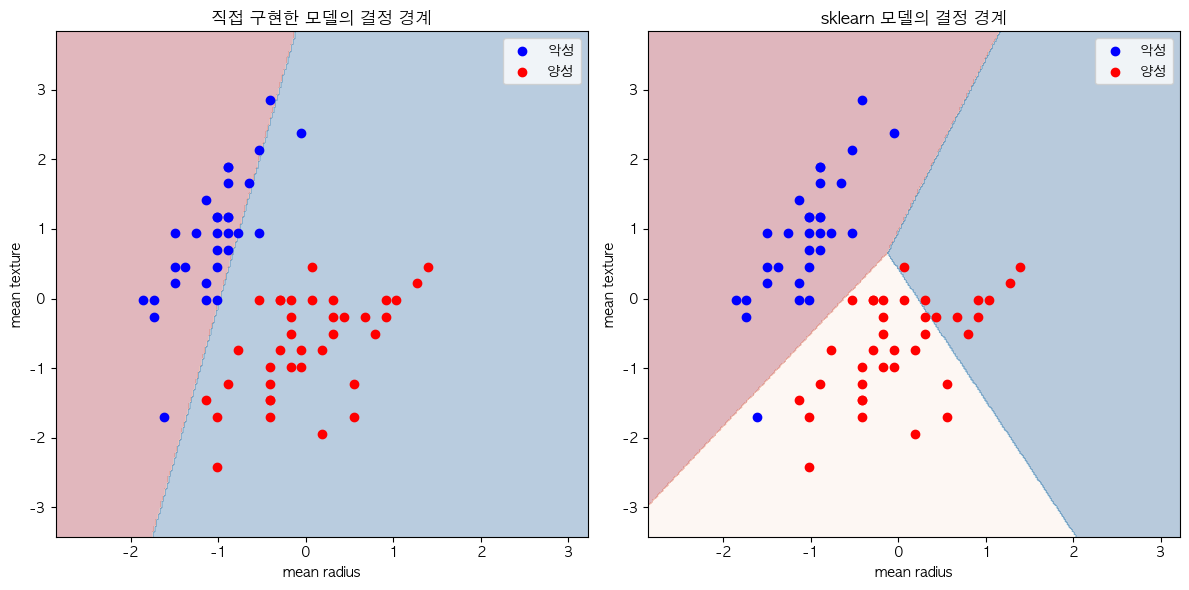

In [12]:
# 경사 하강법을 이용한 로지스틱 회귀 직접 구현
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # 가중치 및 편향 초기화
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # 경사 하강법을 사용한 가중치 업데이트
        for _ in range(self.n_iterations):
            # 예측값 계산
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # 기울기 계산
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # 가중치 및 편향 업데이트
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
        return self
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

# 간단한 데이터셋으로 테스트 (유방암 데이터 사용)
X_simple = X_train_scaled[:, :2]  # 첫 두 특성만 사용
y_simple = y_train

# 직접 구현한 모델과 sklearn 모델 비교
my_model = MyLogisticRegression(learning_rate=0.1, n_iterations=1000)
my_model.fit(X_simple, y_simple)

sklearn_model = LogisticRegression()
sklearn_model.fit(X_simple, y_simple)

# 결과 비교
print("\n[수동 구현 모델과 sklearn 모델 비교]")
print(f"직접 구현한 모델 가중치: {my_model.weights}")
print(f"직접 구현한 모델 편향: {my_model.bias}")
print(f"sklearn 모델 가중치: {sklearn_model.coef_[0]}")
print(f"sklearn 모델 편향: {sklearn_model.intercept_[0]}")

# 결정 경계 시각화 (첫 번째, 두 번째 특성만 사용)
plt.figure(figsize=(12, 6))

# 1. 직접 구현한 모델의 결정 경계
plt.subplot(1, 2, 1)
h = 0.02
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = my_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
plt.scatter(X_simple[y_simple==0, 0], X_simple[y_simple==0, 1], c='blue', label='악성')
plt.scatter(X_simple[y_simple==1, 0], X_simple[y_simple==1, 1], c='red', label='양성')
plt.title('직접 구현한 모델의 결정 경계')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend()

# 2. sklearn 모델의 결정 경계
plt.subplot(1, 2, 2)
Z = sklearn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
plt.scatter(X_simple[y_simple==0, 0], X_simple[y_simple==0, 1], c='blue', label='악성')
plt.scatter(X_simple[y_simple==1, 0], X_simple[y_simple==1, 1], c='red', label='양성')
plt.title('sklearn 모델의 결정 경계')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend()

plt.tight_layout()
plt.show()

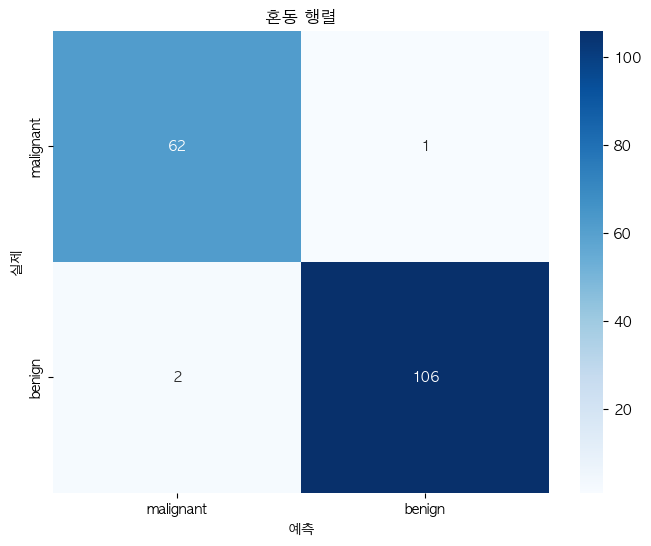


[분류 보고서]
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, 
            yticklabels=cancer.target_names)
plt.xlabel('예측')
plt.ylabel('실제')
plt.title('혼동 행렬')
plt.show()

# 분류 보고서
print("\n[분류 보고서]")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))
